<a href="https://colab.research.google.com/github/giovannidispoto/machine-and-deep-learning-playground/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
!unzip /gdrive/MyDrive/diabetes.zip

Archive:  /gdrive/MyDrive/diabetes.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features = pd.read_csv('diabetes.csv')
labels = features['Outcome']

features.head()
features.size

6912

In [5]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Train-Test split + handling missing values with medians

Text(0.5, 1.0, 'Test label hist')

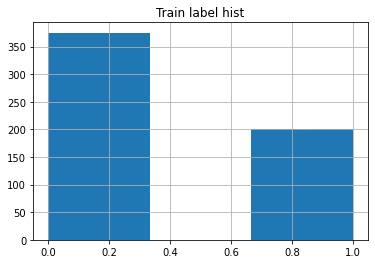

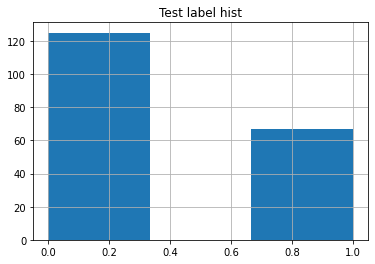

In [6]:
train, test = train_test_split(features, test_size=0.25, random_state=1234, shuffle=True, stratify=labels)
train_outcome = train.Outcome
train_features = train.drop(columns=['Outcome'])

# Subtracting one in order to have -1 in missing values and having a stronger indicator for that. 
train_features = train_features.replace(0,train_features['Insulin'].median())
train_features = train_features.replace(0,train_features['SkinThickness'].median())
train_features = train_features.replace(0,train_features['BMI'].median())
train_features= train_features.replace(0,train_features['BloodPressure'].median())
train_features = train_features.replace(0,train_features['Glucose'].median())


test_outcome = test.Outcome
test_features = test.drop(columns=['Outcome'])

test_features = test_features.replace(0,test_features['Insulin'].median())
test_features = test_features.replace(0,test_features['SkinThickness'].median())
test_features = test_features.replace(0,test_features['BMI'].median())
test_features = test_features.replace(0,test_features['BloodPressure'].median())
test_features = test_features.replace(0,test_features['Glucose'].median())

#plot histogram train-test
train.hist(column='Outcome', bins=3)
plt.title("Train label hist")

test.hist(column='Outcome', bins=3)
plt.title("Test label hist")

In [7]:
train_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,6.985243,120.330729,70.026910,27.252604,88.478299,32.160243,0.485181,33.493056
std,6.944266,31.471954,16.556797,9.557150,105.226736,6.997885,0.346874,11.938099
min,1.000000,22.500000,22.500000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.000000,64.000000,22.500000,22.500000,27.100000,0.249000,24.000000
50%,4.500000,116.000000,72.000000,22.750000,22.750000,32.000000,0.384000,29.000000
75%,8.000000,139.000000,80.000000,32.000000,125.000000,36.500000,0.645250,41.000000
max,22.500000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000



# Plotting the features



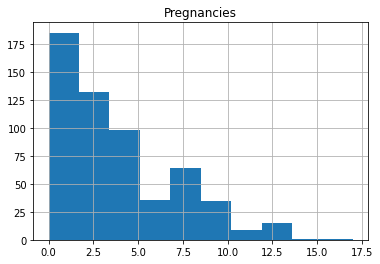

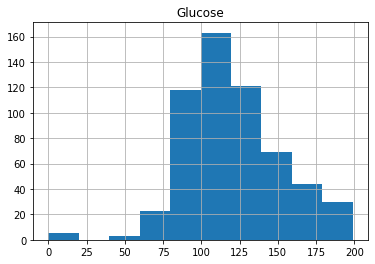

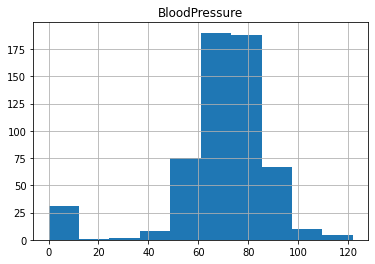

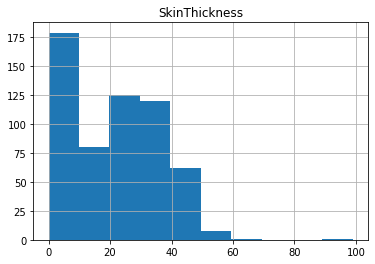

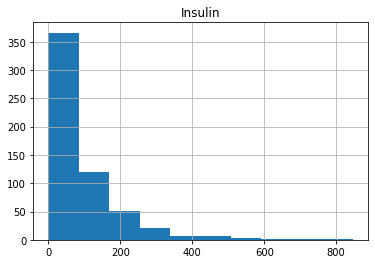

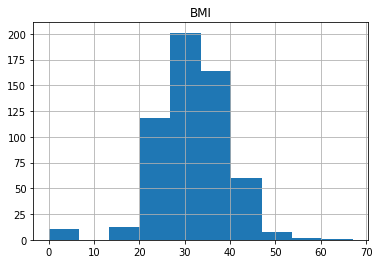

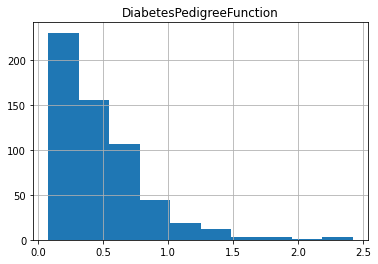

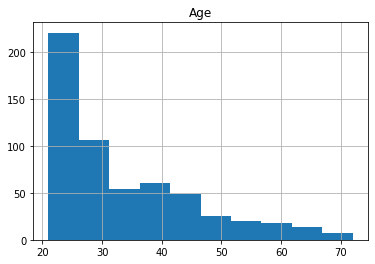

In [8]:
for column in train_features.columns:
  train.hist(column=column)

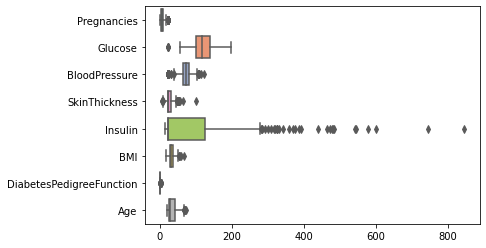

In [9]:
import seaborn as sns
sns.boxplot(data = train_features, palette='Set2', orient='h')

In [10]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


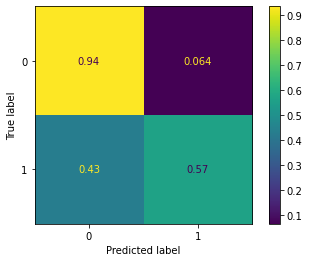

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome, normalize='true')  
plt.show() 

In [12]:
# 1. Perform z-scoring for outlier removal
from scipy.stats import zscore
import numpy as np

feature_list = train_features.columns.tolist()
print('Train subjects before outlier removal: ' + str(train_features.shape))

# apply zscore
zscore_features = train_features.apply(zscore, axis=0)

# select all those values with zscore < -+ 3 and discard outliers 
abs_zscores = np.abs(zscore_features)
filtered_entries = (abs_zscores < 3).all(axis=1)

train_features = train_features[filtered_entries]
train_outcome = train_outcome[filtered_entries]

print('Train subjects after outlier removal: ' + str(train_features.shape))

display(train_features)

Train subjects before outlier removal: (576, 8)
Train subjects after outlier removal: (545, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
92,7.0,81.0,78.0,40.0,48.0,46.7,0.261,42
155,7.0,152.0,88.0,44.0,22.5,50.0,0.337,36
276,7.0,106.0,60.0,24.0,22.5,26.5,0.296,29
16,22.5,118.0,84.0,47.0,230.0,45.8,0.551,31
672,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47
...,...,...,...,...,...,...,...,...
574,1.0,143.0,86.0,30.0,330.0,30.1,0.892,23
298,14.0,100.0,78.0,25.0,184.0,36.6,0.412,46
223,7.0,142.0,60.0,33.0,190.0,28.8,0.687,61
36,11.0,138.0,76.0,22.5,22.5,33.2,0.420,35


In [13]:
# 2. Standarize data with RobustScaler transformation
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)

# adapt test set
transformer_test = RobustScaler().fit(test_features)
test_features = transformer_test.transform(test_features)
test_features = pd.DataFrame(data=test_features, columns=features_list)

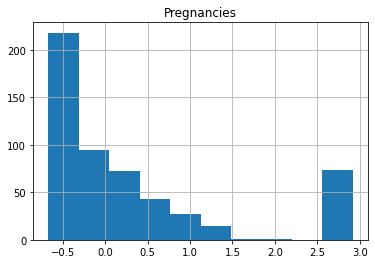

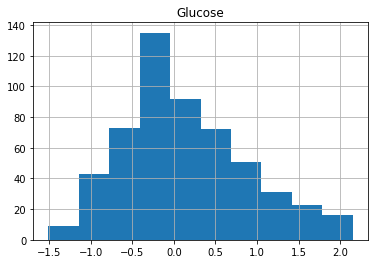

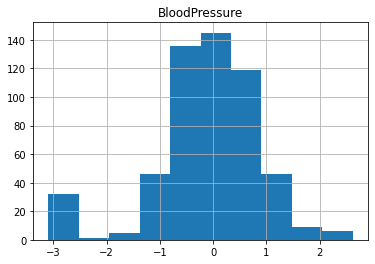

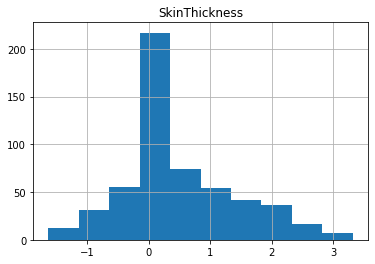

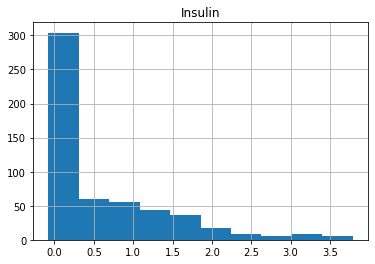

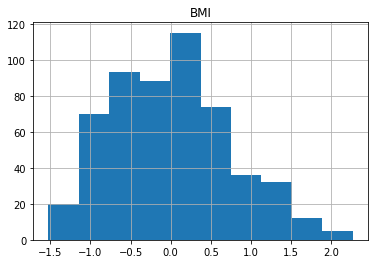

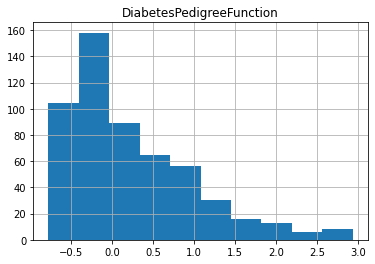

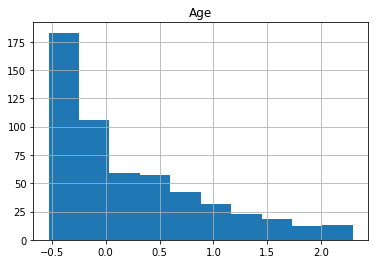

In [14]:
for column in train_features.columns:
  train_features.hist(column=column)

In [15]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


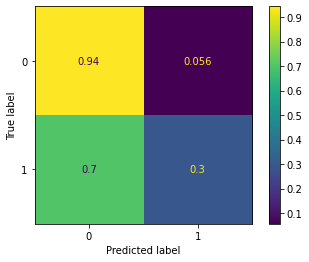

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome, normalize='true')  
plt.show() 

**Features Selection**

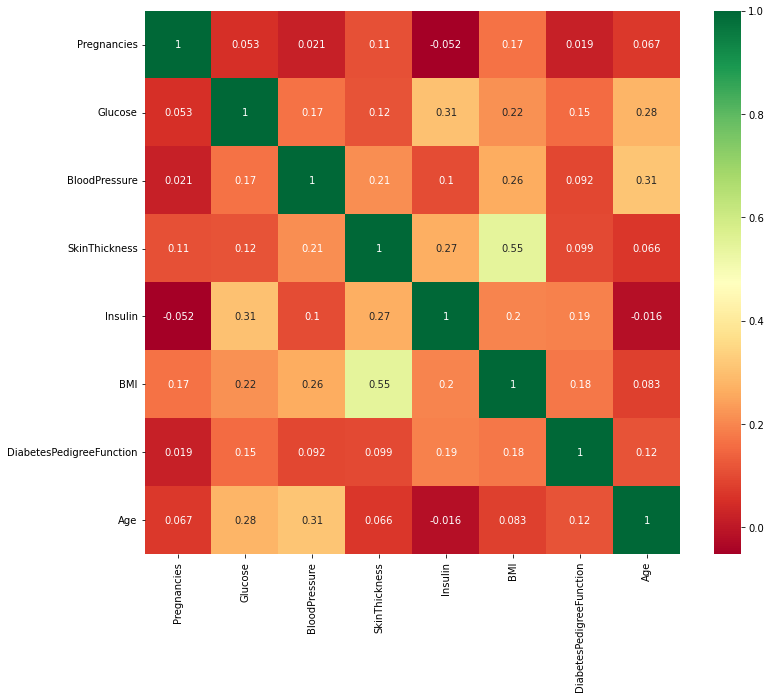

In [17]:
import seaborn as sns

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [18]:
train_features_full = train_features
test_features_full = test_features

In [19]:
#   iii. recursive feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

logistic = LogisticRegression(random_state=1234)
min_features_to_select = 1

rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(3),
              scoring='balanced_accuracy',
              min_features_to_select=min_features_to_select)

rfecv.fit(train_features, train_outcome)

train_features = train_features.iloc[:, rfecv.support_]

test_features = test_features.drop(columns = list(set(test_features.columns) - set(train_features.columns)))
print("Survived: ", list(train_features.columns))

Survived:  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Now let's see a LogisticRegression with LASSO which features selects

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C = 1/0.1, random_state=1234, class_weight='balanced', solver='liblinear')
lr.fit(train_features_full, train_outcome)

LogisticRegression(C=10.0, class_weight='balanced', penalty='l1',
                   random_state=1234, solver='liblinear')

In [21]:
for i, feature in enumerate(list(train_features_full.columns)):
  print("Feature ", feature, " scores ", lr.coef_[0][i-1])

Feature  Pregnancies  scores  0.42284454428538865
Feature  Glucose  scores  0.030707436720930875
Feature  BloodPressure  scores  1.5397146124822232
Feature  SkinThickness  scores  -0.2178801158461593
Feature  Insulin  scores  0.005563232543204985
Feature  BMI  scores  -0.18144040904130282
Feature  DiabetesPedigreeFunction  scores  0.9543138132086656
Feature  Age  scores  0.5482123173703317


Trying to fit model using selected features

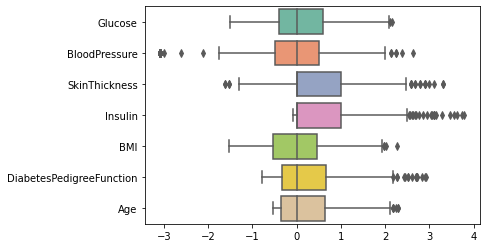

In [22]:
sns.boxplot(data = train_features, palette='Set2', orient='h')

Trying to fit the model with first set of features gived by wrapper method

In [23]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


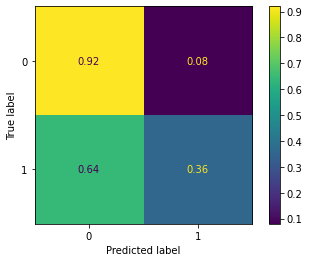

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome, normalize='true')  
plt.show() 

In [25]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features_full[["Age", "BMI", "Glucose"]],train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


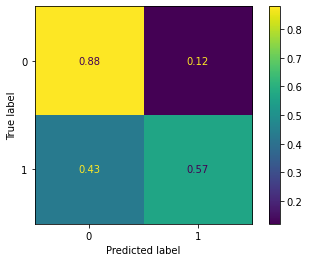

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features_full[["Age", "BMI", "Glucose"]] , test_outcome, normalize='true')  
plt.show() 

Age, BMI and Glucose seems good combination of features

In [27]:
train_features = train_features_full[["Age", "BMI", "Glucose"]]
test_features = test_features_full[["Age", "BMI", "Glucose"]]
                                     

In [48]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight='balanced', # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(class_weight='balanced', random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


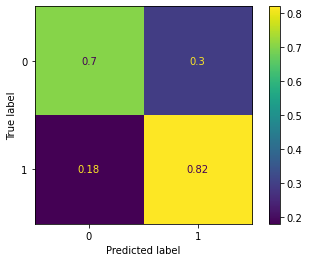

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features, test_outcome, normalize='true')  
plt.show() 

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=1234, class_weight='balanced', max_depth=100, n_estimators=300)
randomForest.fit(train_features, train_outcome)

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=300,
                       random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


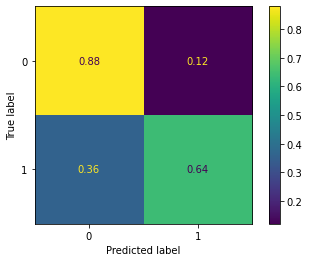

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForest, test_features, test_outcome, normalize='true')  
plt.show() 

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1234, n_estimators=100)
ada.fit(train_features, train_outcome)

AdaBoostClassifier(n_estimators=100, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


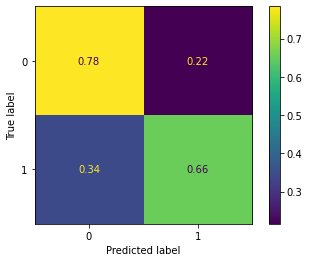

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ada, test_features, test_outcome, normalize='true')  
plt.show() 

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_features, train_outcome)

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


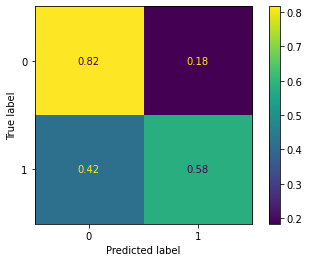

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, test_features, test_outcome, normalize='true')  
plt.show() 

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(train_features, train_outcome)

GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


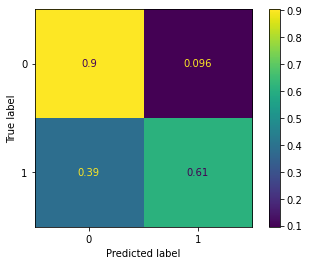

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, test_features, test_outcome, normalize='true')  
plt.show() 

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, svclassifier.predict(test_features)))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       125
           1       0.60      0.82      0.69        67

    accuracy                           0.74       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.78      0.74      0.75       192



In [39]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, randomForest.predict(test_features)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       125
           1       0.74      0.64      0.69        67

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [40]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, ada.predict(test_features)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       125
           1       0.62      0.66      0.64        67

    accuracy                           0.74       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



# Hyperparameters Optimization

Let's try to do a Random Search in order to find a better model starting from the models that we have considered before like SVM and RandomForest.

{'kernel': 'rbf', 'gamma': 0.001, 'coef0': 0.0, 'class_weight': 'balanced', 'C': 10} 0.7006202213051791
{'kernel': 'linear', 'coef0': 0.5, 'class_weight': 'balanced', 'C': 1000} 0.7041961187944926
{'kernel': 'rbf', 'gamma': 0.001, 'coef0': 1, 'class_weight': 'balanced', 'C': 10} 0.7006202213051791
{'kernel': 'linear', 'coef0': 0.1, 'class_weight': 'balanced', 'C': 100} 0.7041961187944926
{'kernel': 'rbf', 'gamma': 0.0001, 'coef0': 0.5, 'class_weight': 'balanced', 'C': 1000} 0.7024948712835072
{'kernel': 'linear', 'coef0': 1, 'class_weight': 'balanced', 'C': 100} 0.7041961187944926
{'kernel': 'rbf', 'gamma': 0.001, 'coef0': 0.5, 'class_weight': 'balanced', 'C': 1} 0.707219927856773
{'kernel': 'rbf', 'gamma': 0.0001, 'coef0': 1, 'class_weight': 'balanced', 'C': 1000} 0.7024948712835072
{'kernel': 'rbf', 'gamma': 0.0001, 'coef0': 0.5, 'class_weight': 'balanced', 'C': 10} 0.7080862041967465
{'kernel': 'rbf', 'gamma': 0.001, 'coef0': 0.1, 'class_weight': 'balanced', 'C': 100} 0.702380634675

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


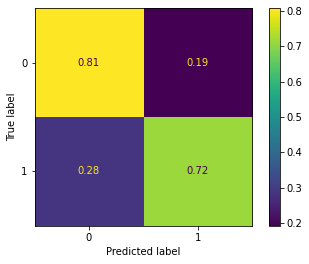

In [52]:
param_grid = [
              {'kernel': ['rbf'], 
               'gamma': [1e-3, 1e-4],
               'C': [1, 10, 100, 1000],
               'coef0': [0.0, 0.1, 0.5, 1], 
               'class_weight': ['balanced']},
              {'kernel': ['linear'],
               'C': [1, 10, 100, 1000], 
               'class_weight': ['balanced'],
               'coef0': [0.0, 0.1, 0.5, 1]},
              ]

# 2. Crossvalidate model to obtain the best fit 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(SVC(random_state=1234), param_grid, cv=cv, scoring='f1_macro', random_state=1234)
clf.fit(train_features, train_outcome)

for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

print('Best combination of hyperparameters: ' + str(clf.best_params_))

clf_best = SVC(**clf.best_params_, random_state=1234)
clf_best.fit(train_features, train_outcome)

print(classification_report(test_outcome, clf_best.predict(test_features)))
plot_confusion_matrix(clf_best, test_features, test_outcome, normalize='true')  
plt.show() 

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50} 0.713846656518003
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60} 0.7147037250236995
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None} 0.6943295969650004
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40} 0.7062672021539097
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70} 0.6943295969650004
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90} 0.6943338248512484
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100} 0.6930474240367889
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


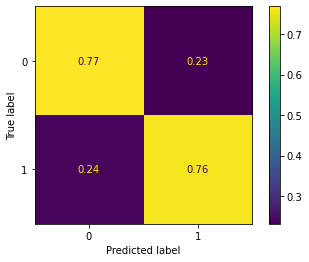

In [42]:
# 1. Define the values for each hyperparameter
param_grid = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

# 2. Crossvalidate model to obtain the best fit 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=1234), param_grid, cv = cv, scoring='f1_macro', random_state=1234)
clf.fit(train_features, train_outcome)

for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

print('Best combination of hyperparameters: ' + str(clf.best_params_))

clf_best = RandomForestClassifier(**clf.best_params_, class_weight='balanced', random_state=1234)
clf_best.fit(train_features, train_outcome)

print(classification_report(test_outcome, clf_best.predict(test_features)))
plot_confusion_matrix(clf_best, test_features, test_outcome, normalize='true')  
plt.show() 